# SlashGPT Architecture

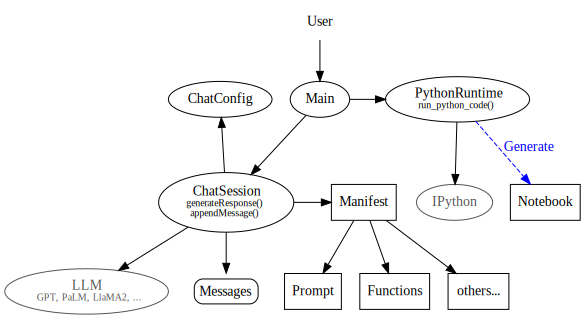

In [91]:
from graphviz import Source
from IPython.display import display

diagram = """
digraph {
    Main;
    ChatConfig;
    ChatSession [label=<ChatSession<br/><font point-size='10'>generateResponse()<br/>appendMessage()</font>>];
    PythonRuntime [label=<PythonRuntime<br/><font point-size='10'>run_python_code()</font>>];
    LLM [label=<LLM<br/><font point-size='10'>GPT, PaLM, LlaMA2, ...</font>> color="#555555" fontcolor="#555555"];
    Manifest [label=Manifest shape=box];
    Main -> ChatSession;
    ChatSession -> ChatConfig;
    ChatSession -> LLM;
    ChatSession -> Manifest;
    Main -> PythonRuntime
    IPython [color="#555555" fontcolor="#555555"]
    PythonRuntime -> IPython
    PythonRuntime -> Notebook [style=dashed, color=blue, label="Generate" fontcolor="blue"]
    Notebook [shape=box]
    { rank=same Main, PythonRuntime, ChatConfig }
    { rank=same ChatSession Manifest }
    Manifest -> { Prompt, Functions, Others };
    Prompt [shape=box];
    Functions [shape=box];
    Others [shape=box, label="others..."];
    { rank=same Prompt Functions }
    Messages [
        shape=plaintext
        label=<<table border='1' cellborder='0' style='rounded'><tr><td>Messages</td></tr></table>>
    ]
    ChatSession -> Messages
    User -> Main
    User [shape=plaintext]
}
"""

graph = Source(diagram)
display(graph)

## Main

Main object is the main application object, which has the runloop. It creates a ChatConfig object first, then create multiple ChatSession objects sequentially during the lifetime of the application.

## ChatConfig

ChatConfig object is a singletone object, which keeps various global variables, such as OpenAI key and "verbose mode" flag, across multiple chat sessions. It calls its SwitchContext() function to terminate the current chat session and start another.

## ChatSession

ChatSession object maintains the list of messages between the user and the agent, along with other properties of the session, such as the name of LLM model, temperature and system prompt. A new ChatSession object is initialized with a manifest file, which defines the behavior of the agent. 

## PythonRunTime

PythonRuntime is a library which acts as a Python runtime engine, which executes generated code by LLMs. It uses IPython as the default runtime, but can use CodeBox as an alternative. It generages a Jupyter notebook file for each "notebook" session (= a chat session which executes generated Python code). 

##### 